<div align="center" style="font-size: 20px; line-height: 2;">
  <b>CIA 1 Assignment</b><br>
  <b>Regression Analysis</b><br>
  <b>Name:</b> Prem Thiyagrajan<br>
  <b>Class:</b> MDS 'A'<br>
  <b>Roll No:</b> 2348363
  <br>
</div>
<br>
<br>

<div style="line-height: 1.6;">
    <font size="+1">
        <u><b>Case Study : Predicting Housing Prices in New York</b></u>
    </font>
    <br><br>
    <b><font size="+1">Aim :</font></b>
    <br>
    <br>
    <font size="+0.5">
        The primary objective of this dataset is to facilitate predictive modeling to estimate housing prices based on various factors. By analyzing the relationships between predictor variables and housing prices, stakeholders can gain valuable insights into the factors driving real estate market trends in New York City. These insights can inform pricing strategies, investment decisions, urban planning initiatives, and policy interventions aimed at promoting affordable housing and sustainable development.
    </font>
    <br><br>
    <b><font size="+1">Data Description :</font></b>
    <br>
    <br>
    <font size="+0.5">
        The New York Housing Price dataset provides valuable insights into the housing market trends in New York City. This dataset comprises various factors that influence housing prices, including house area, number of bedrooms, furnished status, proximity to main roads, and more. It serves as a valuable resource for real estate professionals, policymakers, and researchers interested in understanding the dynamics.
    </font>
    <br><br>
    <b><font size="+1">Methodology :</font></b>
    <br>
    <br>
    <font size="+0.5">
        The methodology employed in this study involves leveraging predictive modeling techniques to estimate housing prices based on a diverse set of predictor variables. The theoretical foundation of this methodology lies in the principles of linear regression analysis, a widely used statistical method for modeling the relationship between a dependent variable (housing prices) and one or more independent variables (such as house area, number of bedrooms, furnished status, proximity to main roads, etc.).
        <br>
        <br>
        Central to the methodology is the assumption that there exists a linear relationship between the predictor variables and the housing prices in the dataset. This assumption aligns with the fundamental premise of linear regression, which posits that the dependent variable can be modeled as a linear combination of the independent variables, augmented by a random error term. By fitting a linear regression model to the dataset, we aim to estimate the coefficients associated with each predictor variable, which represent the magnitude and direction of their impact on housing prices.
    </font>
</div>


In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
data = pd.read_csv("C:/Christ Uni Acad/Trimester 3/Machine Learning/datasets/Housing.csv")
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


### Data Cleaning : 

In [11]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [12]:
# Mapping 'yes' to 1 and 'no' to 0 for specified columns
binary_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
data[binary_columns] = data[binary_columns].replace({'yes': 1, 'no': 0})
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished


In [13]:
print(data['furnishingstatus'].unique())

['furnished' 'semi-furnished' 'unfurnished']


In [14]:
# Replacing unexpected values with 'unfurnished'
data['furnishingstatus'].replace({'unexpected_value': 'unfurnished'}, inplace=True)

# Mapping to numerical values
data['furnishingstatus'] = data['furnishingstatus'].map({'furnished': 1, 'semi-furnished': 2, 'unfurnished': 3})

# Printing the updated DataFrame
print(data)

        price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0    13300000  7420         4          2        3         1          0   
1    12250000  8960         4          4        4         1          0   
2    12250000  9960         3          2        2         1          0   
3    12215000  7500         4          2        2         1          0   
4    11410000  7420         4          1        2         1          1   
..        ...   ...       ...        ...      ...       ...        ...   
540   1820000  3000         2          1        1         1          0   
541   1767150  2400         3          1        1         0          0   
542   1750000  3620         2          1        1         1          0   
543   1750000  2910         3          1        1         0          0   
544   1750000  3850         3          1        2         1          0   

     basement  hotwaterheating  airconditioning  parking  prefarea  \
0           0                0           

### Exploratory Data Analysis

In [15]:
data.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,2.069725
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.761373
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,3.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,3.000000


In [16]:
# Calculating summary statistics for 'price'
mean_price = data['price'].mean()
median_price = data['price'].median()
std_price = data['price'].std()

print(f"Mean Price: {mean_price:.2f}")
print(f"Median Price: {median_price:.2f}")
print(f"Standard Deviation of Price: {std_price:.2f}")

Mean Price: 4766729.25
Median Price: 4340000.00
Standard Deviation of Price: 1870439.62


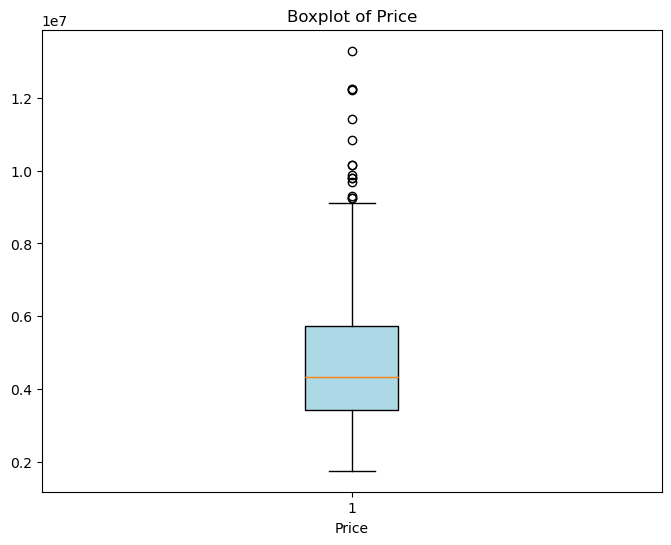

In [17]:
# Creating a boxplot for 'price'
plt.figure(figsize=(8, 6))
plt.boxplot(data['price'], vert=True, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title("Boxplot of Price")
plt.xlabel("Price")
plt.show()

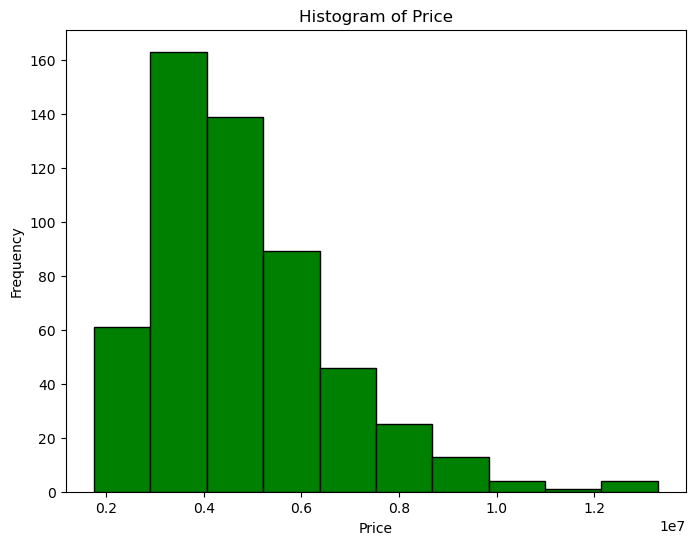

In [18]:
# Creating a histogram for 'price'
plt.figure(figsize=(8, 6))
plt.hist(data['price'], bins=10, edgecolor='black', color='green')
plt.title("Histogram of Price")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

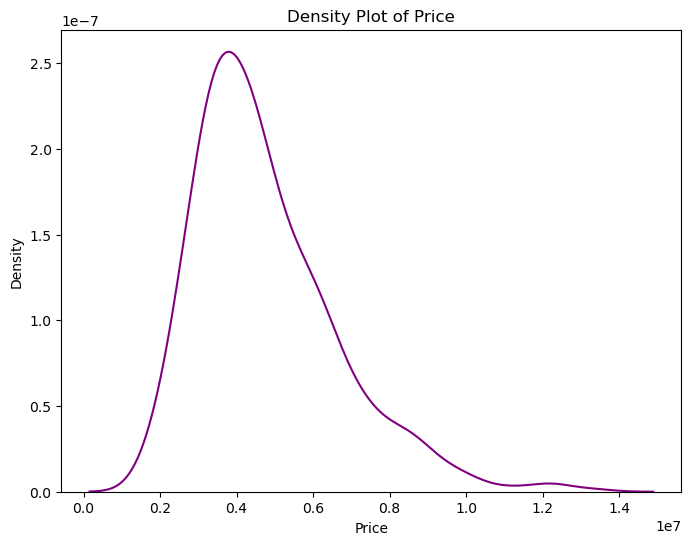

In [19]:
# Creating a density plot for 'price'
plt.figure(figsize=(8, 6))
sns.kdeplot(data['price'], color='purple')
plt.title("Density Plot of Price")
plt.xlabel("Price")
plt.ylabel("Density")
plt.show()

Text(0.5, 1.0, 'Histogram of Area')

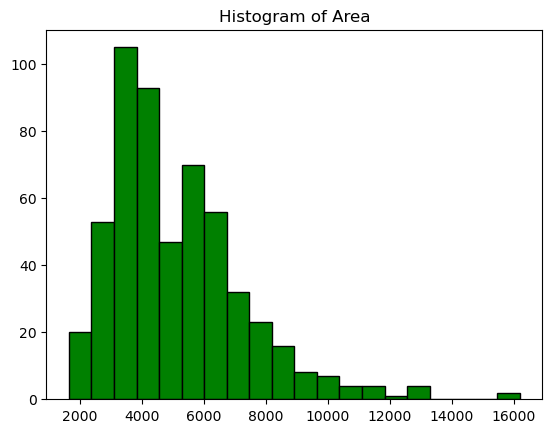

In [20]:
# Histogram for 'area'
plt.hist(data['area'], bins=20, edgecolor='black', color='green')
plt.title("Histogram of Area")


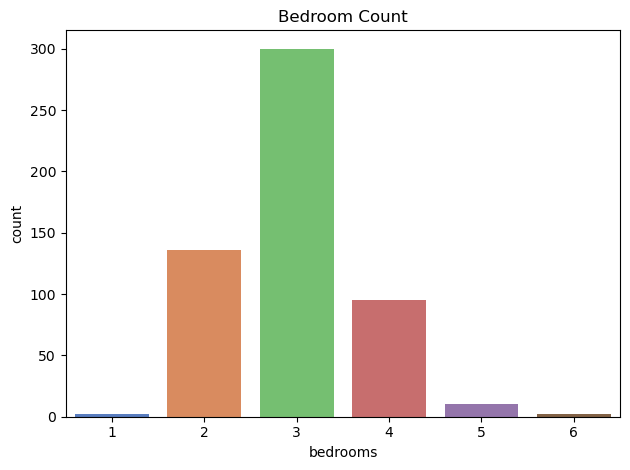

In [21]:
# Bar plot for 'bedrooms'
sns.countplot(x='bedrooms', data=data, palette='muted')
plt.title("Bedroom Count")

plt.tight_layout()
plt.show()


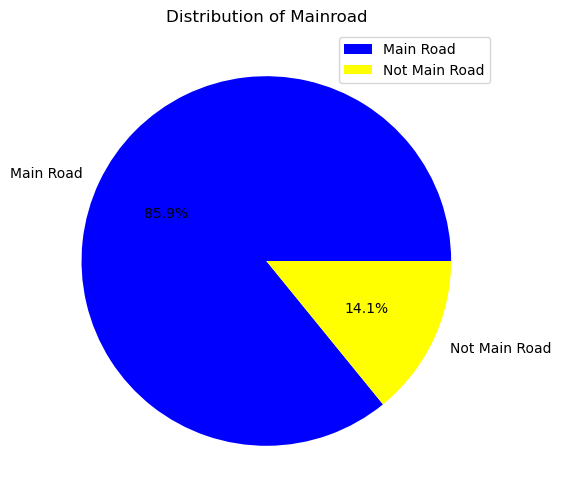

In [22]:
# Pie chart for 'mainroad'
plt.figure(figsize=(8, 6))
data['mainroad'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'yellow'], labels=['Main Road', 'Not Main Road'])
plt.title('Distribution of Mainroad')
plt.ylabel('')
plt.legend()
plt.show()

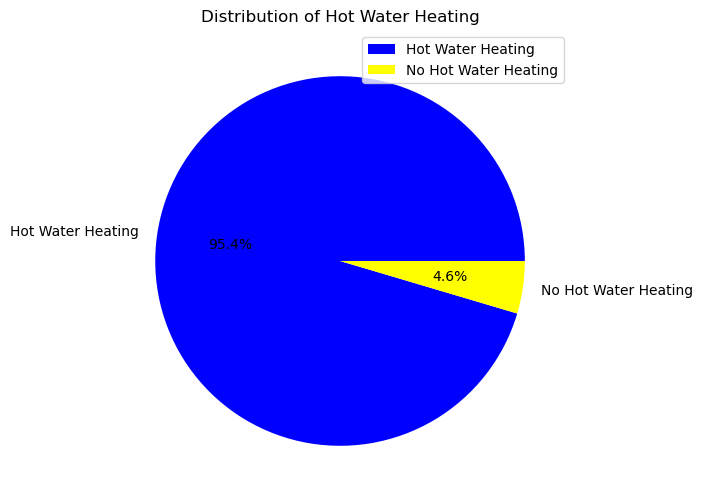

In [23]:
# Pie chart for 'hotwaterheating'
plt.figure(figsize=(8, 6))
data['hotwaterheating'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'yellow'], labels=['Hot Water Heating', 'No Hot Water Heating'])
plt.title('Distribution of Hot Water Heating')
plt.ylabel('')
plt.legend()
plt.show()

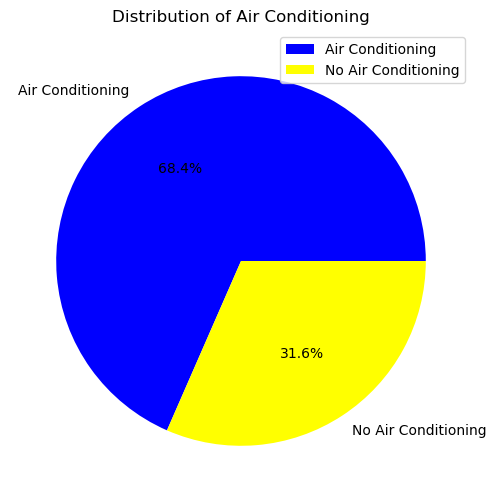

In [24]:
# Pie chart for 'airconditioning'
plt.figure(figsize=(8, 6))
data['airconditioning'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'yellow'], labels=['Air Conditioning', 'No Air Conditioning'])
plt.title('Distribution of Air Conditioning')
plt.ylabel('')
plt.legend()
plt.show()

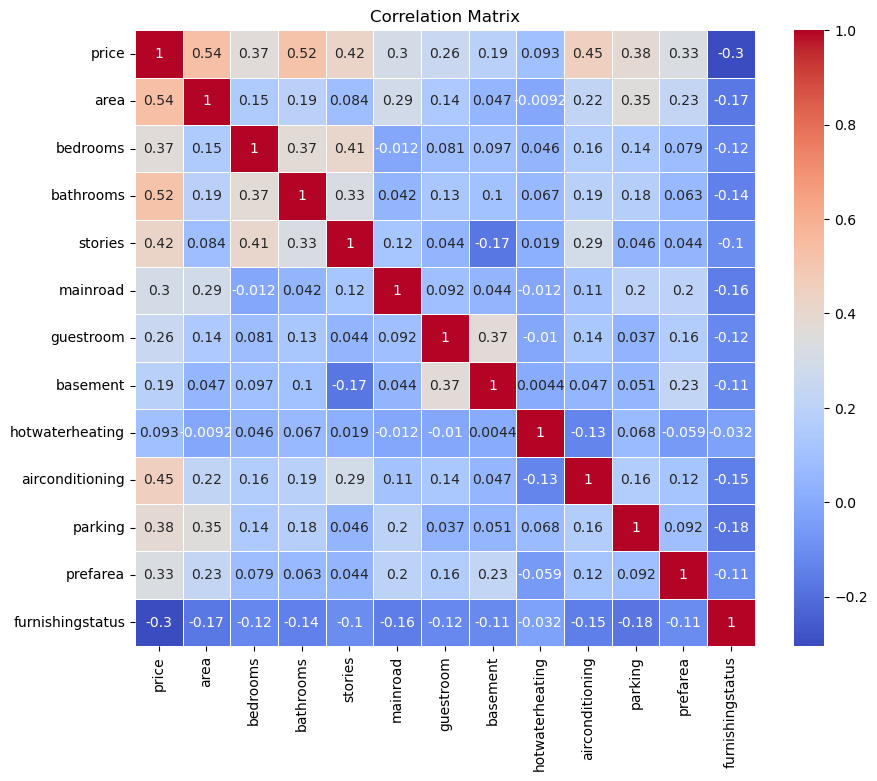

In [25]:
# Correlation Matrix
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

### Regression Fitting

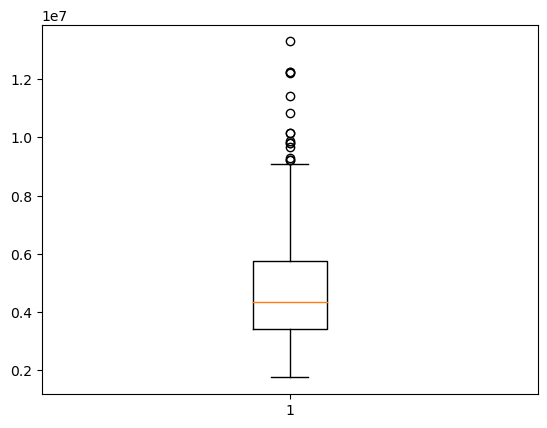

In [26]:
plt.boxplot(data["price"])
plt.show()

#### From the above plot we can see that my data has a lot of outliers so we remove them subsequently

In [27]:
data = data[data['price'] <= 8500000]
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
26,8463000,6000,3,2,4,1,1,1,0,1,0,1,2
27,8400000,8875,3,1,1,1,0,0,0,0,1,0,2
28,8400000,7950,5,2,2,1,0,1,1,0,2,0,3
29,8400000,5500,4,2,2,1,0,1,0,1,1,1,2
30,8400000,7475,3,2,4,1,0,0,0,1,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,3
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,2
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,3
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1


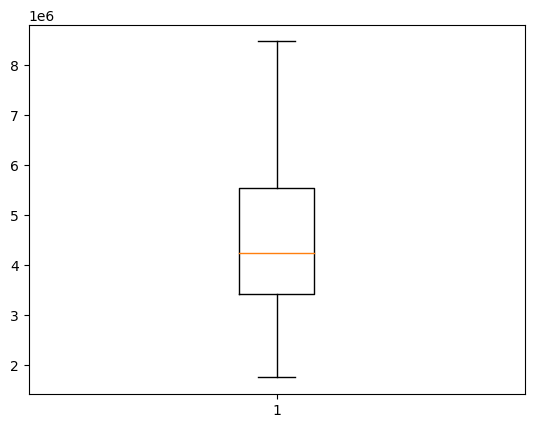

In [28]:
plt.boxplot(data["price"])
plt.show()

#### Now there are no visible outliers in the data

In [29]:
X = data[["area"]] # Feature : independent
y = data["price"] # Target : dependent

In [30]:
# Normalizing y
y_norm = (y - y.mean())/(y.std())
# The code is used to normalize a numerical variable y
# Normalization (also known as feature scaling)
# is a common preprocessing step in machine learning to scale the features to a similar range.

In [31]:
X

,area
26,6000
27,8875
28,7950
29,5500
30,7475
...,...
540,3000
541,2400
542,3620
543,2910


In [32]:
y

26     8463000
27     8400000
28     8400000
29     8400000
30     8400000
        ...   
540    1820000
541    1767150
542    1750000
543    1750000
544    1750000
Name: price, Length: 519, dtype: int64

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y_norm,test_size = 0.25,train_size = 0.75,random_state=42)

In [34]:
model = LinearRegression()

In [35]:
model.fit(X_train,y_train)

LinearRegression()

In [36]:
y_pred = model.predict(X_test)
y_pred

array([-0.37422814,  0.4416375 , -0.05720606, -0.07585442,  0.41366496,
       -0.34415766, -0.34392456, -0.14345472, -0.07235785, -0.35557978,
        0.0453599 ,  0.15725005, -0.49544246, -0.63530514,  0.54933176,
       -0.69474678,  0.18056049,  1.47195924, -0.06653024,  0.39618212,
        0.4835963 ,  0.34373362, -0.07585442,  0.19174951, -0.07119233,
        0.42065809, -0.14578576, -0.03855771,  0.04069781,  0.28778855,
       -0.25487865, -0.34858665, -0.35557978,  0.43697541,  0.72835599,
        0.20387094, -0.56910348,  1.05866502, -0.37889023,  0.49758257,
       -0.38821441, -0.49544246, -0.262338  , -0.49544246, -0.29730367,
       -0.49544246, -0.23902755, -0.14578576, -0.45348366, -0.23436546,
       -0.52574604,  0.11062915,  0.08731871,  0.90318434,  0.19454676,
       -0.30895889, -0.72854693,  0.20387094,  0.65842465,  0.2854575 ,
       -0.45231814, -0.63530514, -0.49544246,  0.06400826,  0.80528047,
       -0.34858665, -0.24368964,  0.90318434, -0.2157171 ,  0.20

In [37]:
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test,y_pred)
print("The mean squared error is : ",mse)
print("Slope (coefficient) : ",model.coef_[0])
print("Intercept : ",model.intercept_)
print("R-squared value : ",r_squared)

The mean squared error is :  0.8911347410460252
Slope (coefficient) :  0.00023310446757443504
Intercept :  -1.1947558663007936
R-squared value :  0.2717312345807389


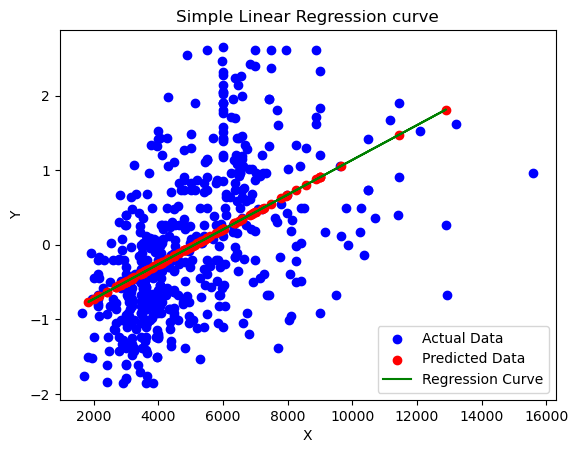

In [38]:
plt.scatter(X,y_norm,color = 'blue',label = 'Actual Data')
plt.scatter(X_test,y_pred, color = 'red', label = 'Predicted Data')
plt.plot(X_test, y_pred, color="green", label="Regression Curve")
plt.title('Simple Linear Regression curve')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [41]:
# Sampling a subset of the data
sample_size = 100
sample_data = data.sample(sample_size, random_state=42)
# Preparing features and target
X_sample = sample_data[["area"]]
y_sample = sample_data["price"]
# Normalizing the target variable
y_sample_norm = (y_sample - y_sample.mean()) / y_sample.std()
# Spliting data into train and test sets
X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(
    X_sample, y_sample_norm, test_size=0.25, random_state=42
)
# Fitting a linear regression model
model_sample = LinearRegression()
model_sample.fit(X_train_sample, y_train_sample)
# Predictions
y_pred_sample = model_sample.predict(X_test_sample)

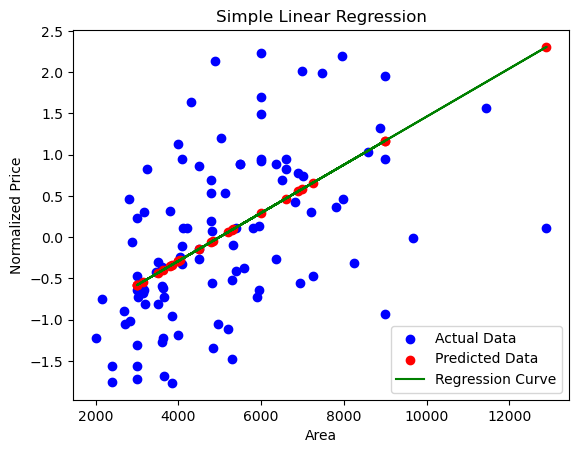

In [42]:
# Plot actual vs. predicted data
plt.scatter(X_sample, y_sample_norm, color="blue", label="Actual Data")
plt.scatter(X_test_sample, y_pred_sample, color="red", label="Predicted Data")
plt.plot(X_test_sample, y_pred_sample, color="green", label="Regression Curve")
plt.title("Simple Linear Regression")
plt.xlabel("Area")
plt.ylabel("Normalized Price")
plt.legend()
plt.show()

In [ ]:
# Fit the linear regression model using statsmodels
model_sm = sm.OLS(y_sample_norm, X_sample_const)
result = model_sm.fit()

In [ ]:
# Print summary of the regression results
print(result.summary())

In [ ]:
# Confidence intervals for regression coefficients
print("\nConfidence Intervals for Regression Coefficients:")
print(result.conf_int())

<div style="line-height: 1.6;">
    <br><br>
    <b><font size="+1"><u>Result :</u></font></b>
    <br>
    <br>
    <font size="+0.5">
        - The mean squared error (MSE) of the fitted model is approximately 0.8911, indicating a relatively low level of error in predicting housing prices.
        <br>
        - The R-squared value of approximately 0.2717 suggests that the model explains around 27.17% of the variability in housing prices.
        <br>
        - The positive slope coefficient indicates that increases in predictor variables are associated with higher housing prices.
    </font>
    <br><br>
    <font size="+1">
        <b><u>Conclusion :</u></b>
        <br><br>
        <font size="+0.5">
            The results of the model fitting highlight the potential of linear regression analysis in understanding and predicting housing prices in New York City. While the model's explanatory power is moderate, it still provides valuable insights into the factors influencing housing prices. The positive slope coefficient indicates that increases in predictor variables are associated with higher housing prices, which aligns with expectations. Moving forward, further refinement of the model and inclusion of additional relevant variables could enhance its predictive accuracy and explanatory power. Nevertheless, the current model represents a significant step towards understanding the dynamics of the housing market in New York City. With continued iteration and refinement, it holds promise for informing pricing strategies, investment decisions, and urban planning initiatives aimed at promoting sustainable development and affordable housing in the city.
        </font>
        <br>
    </font>
</div>
